In [65]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


'''# 字符类型的时间
tss1 = '2010/04/09 04:44:11'
'''

#converters强制每个标签的数值类型
sheet = pd.read_excel('flare_euv.xlsx',converters={'DATE':str,'START':str,'PEAKT':str,'ENDT':str,'CLASS':str,'SIGN':int,'CLASS_N':float,'SUB':float,'STARTF':float,'ENDF':float,'CON':float,'T_D':int,'SIGN_2':int,'YEAR':int})
sheet1 = pd.read_excel('flare_x_new.xlsx',converters={'DATE':str,'START':str,'PEAKT':str,'ENDT':str})
#print(type(sheet1['PEAKT'][0]))
#print(type(sheet['PEAKT'][0]))
sheet1.head()

i=0
j=0

while(sheet['N'][i]!=0):
    
    #split切片，将原日期末尾000000去掉
    euv_start=sheet['DATE'][i].split(' ')[0]+' '+sheet['START'][i]  #将日期和时间整理拼接成字符串
    euv_peakt=sheet['DATE'][i].split(' ')[0]+' '+sheet['PEAKT'][i]
    euv_endt=sheet['DATE'][i].split(' ')[0]+' '+sheet['ENDT'][i]
    #print(type(sheet1['DATE'][j]))
    #print(j)
    #print(i)
    x_peakt=sheet1['DATE'][j].split(' ')[0]+' '+sheet1['PEAKT'][j]
#print(euv_start)
    timeArray1 = time.strptime(euv_start, "%Y-%m-%d %H:%M:%S")
    timeStamp1 = int(time.mktime(timeArray1))

    timeArray2 = time.strptime(euv_peakt, "%Y-%m-%d %H:%M:%S")
    timeStamp2 = int(time.mktime(timeArray2))

    timeArray3 = time.strptime(euv_endt, "%Y-%m-%d %H:%M:%S")
    timeStamp3 = int(time.mktime(timeArray3))


    timeArray4 = time.strptime(x_peakt, "%d-%m-%Y %H:%M:%S")  #将日期转化为TAI，秒数格式，唯一识别
    timeStamp4 = int(time.mktime(timeArray4))

    if(timeStamp4>timeStamp1) and (timeStamp4<timeStamp3): #比较x的峰值时间是否在ly耀斑的起始和结束时间段内
        #sheet['CLASS'][i]=sheet1['CLASS'][j]
        sheet.loc[i,('CLASS')]=sheet1['CLASS'][j]
        sheet1.loc[j,('SIGN_1')]=1
        t_d=timeStamp2-timeStamp4
        sheet.loc[i,('T_D')]=t_d
        if(t_d>10): #筛选峰值差大的
            sheet.loc[i,('SIGN_2')]=1
        elif(t_d<-10):
            sheet.loc[i,('SIGN_2')]=2
        elif (t_d>=-10) and (t_d<=10): #筛选峰值差小
            sheet.loc[i,('SIGN_2')]=3
            
        i=i+1
        j=j+1
    elif timeStamp4<timeStamp1:
        j=j+1
    else:
        i=i+1


#lya事件列表的标记
k=0
while(sheet['N'][k]!=0):
    if(sheet['CLASS'][k][0]=='M'):
        sheet.loc[k,('SIGN')]=3  #将M和X级耀斑做标记，后期去掉
        k=k+1
        #print(k)
        
    elif sheet['CLASS'][k][0]=='X':
        sheet.loc[k,('SIGN')]=4  #将M和X级耀斑做标记，后期去掉
        k=k+1
    
    
    elif sheet['CLASS'][k][0]=='0':
        sheet.loc[k,('SIGN')]=0  #将M和X级耀斑做标记，后期去掉
        k=k+1
        
        
    elif sheet['CLASS'][k][0]=='B':#取得耀斑级别对应峰值流量
        num=float(sheet['CLASS'][k][1:]) #截取字符串
        #rate=sheet['SIGNIF(%)'][k]/num#rate率越大，Ly与x差异越大
        num=round(num*(10)**(-7),10)
        sheet.loc[k,('CLASS_N')]=num
        #sheet.loc[k,('RATE')]=rate
        sheet.loc[k,('SIGN')]=1  #将B级耀斑标记为1,后期画图分类
        k=k+1
    elif sheet['CLASS'][k][0]=='C':
        num=float(sheet['CLASS'][k][1:])
        num=round(num*(10)**(-6),10) #取得耀斑级别对应峰值流量,round控制小数位数
        sheet.loc[k,('CLASS_N')]=num #将峰值流量值做成科学计数法，放到CLASS_N标签中
        sheet.loc[k,('SIGN')]=2  #将B级耀斑标记为1,后期画图分类
        
        k=k+1
    else:
        k=k+1


        
        
#xrs事件列表的标记        
k=0
while(sheet1['N'][k]!=0):
    if(sheet1['CLASS'][k][0]=='B') and (sheet1['SIGN_1'][k]==1):
        sheet1.loc[k,('SIGN')]=1  #将M和X级耀斑做标记，后期去掉
        k=k+1
        #print(k)
    elif sheet1['CLASS'][k][0]=='C' and sheet1['SIGN_1'][k]==1:#取得耀斑级别对应峰值流量      
        sheet1.loc[k,('SIGN')]=2  #将B级耀斑标记为1,后期画图分类
        k=k+1
    elif sheet1['CLASS'][k][0]=='M' and sheet1['SIGN_1'][k]==1 :     
        sheet1.loc[k,('SIGN')]=3  #将B级耀斑标记为1,后期画图分类  
        k=k+1
    elif sheet1['CLASS'][k][0]=='X' and sheet1['SIGN_1'][k]==1 :     
        sheet1.loc[k,('SIGN')]=4  #将B级耀斑标记为1,后期画图分类  
        k=k+1
    else:
        k=k+1       
        
        
        
        
        
        
        
        
        
l=0        
while(sheet['N'][l]!=0):
    sheet.loc[l,('DATE')]=sheet['DATE'][l].split(' ')[0]  
    sheet.loc[l,('YEAR')]=int(sheet['DATE'][l][0:4])#将列表中的年份提取出来存储
    l=l+1
    #print(l)

m=0
while(sheet['N'][m]!=0):
    #print(m)
    groud=max(sheet['STARTF'][m],sheet['ENDF'][m])#选取开始或结束中
    #print(type(groud))
    con=sheet['PEAKF'][m]/groud #相对背景的比值
    sub=sheet['PEAKF'][m]-groud #减掉背景后
    sub=round(sub*(10)**(-3),10)
    con=round(con,6)
    sheet.loc[m,('SUB')]=sub
    sheet.loc[m,('CON')]=con
    m=m+1
    
q=0
while(sheet['N'][q]!=0):
    if(sheet['CLASS'][q][0]=='B'):
        rate=sheet['SUB'][q]/sheet['CLASS_N'][q]
        #sheet.loc[q,('RATE')]=rate  #将M和X级耀斑做标记，后期去掉
        q=q+1
        #print(k)
    else:
        q=q+1

#sheet.head(50)


sheet_new_M=sheet
sheet_new_M=sheet_new_M[sheet_new_M['SIGN'] == 3]
sheet_new_X=sheet
sheet_new_X=sheet_new_X[sheet_new_X['SIGN'] == 4]


sheet1_new_M=sheet1
sheet1_new_M=sheet1_new_M[sheet1_new_M['SIGN'] == 3]
sheet1_new_X=sheet1
sheet1_new_X=sheet1_new_X[sheet1_new_X['SIGN'] == 4]

print(len(sheet_new_M))
sheet1_new_M.head(50)

321


,N,DATE,START,PEAKT,ENDT,CLASS,SS,SIGN,SIGN_1
94,95,12-06-2010,00:30:00,00:57:00,01:02:00,M2.0,N23W43 11081,3,1
269,270,7-08-2010,17:55:00,18:24:00,18:47:00,M1.0,N11E34 11093,3,1
509,510,16-10-2010,19:07:00,19:12:00,19:15:00,M2.9,S20W26 11112,3,1
654,655,6-11-2010,15:27:00,15:36:00,15:44:00,M5.4,S19E58 11121,3,1
978,979,28-01-2011,00:44:00,01:03:00,01:10:00,M1.3,11149,3,1
1027,1028,9-02-2011,01:23:00,01:31:00,01:35:00,M1.9,N17W72 11153,3,1
1073,1074,13-02-2011,17:28:00,17:38:00,17:47:00,M6.6,S20E04 11158,3,1
1087,1088,14-02-2011,17:20:00,17:26:00,17:32:00,M2.2,N56W18 11158,3,1
1108,1109,16-02-2011,14:19:00,14:25:00,14:29:00,M1.6,S20W32 11158,3,1
1133,1134,18-02-2011,10:23:00,10:26:00,10:37:00,M1.0,11162,3,1


In [173]:
#20141205这次事件图像不全，删除
#也有事件是因为图像开始没有对其0点时刻，导致后面错位，先删除
sheet_new_M1=sheet_new_M.reset_index(drop=True) 
sheet_new_M1=sheet_new_M1.drop(index=[255,256,270]) #删除行
sheet_new_M1=sheet_new_M1.reset_index(drop=True) 

sheet1_new_M1=sheet1_new_M.reset_index(drop=True) 
sheet1_new_M1=sheet1_new_M1.drop(index=[255,256,270]) #删除行
sheet1_new_M1=sheet1_new_M1.reset_index(drop=True) 

In [172]:
sheet_new_M1=sheet_new_M.reset_index(drop=True) 
sheet_new_M1.loc[256]

N                  1580
DATE         2014-12-14
START          19:25:51
PEAKT          19:30:36
ENDT           19:42:14
DUR(m)             16.4
STARTF           9.4359
PEAKF            9.5598
ENDF             9.4112
SIGNIF(%)        1.3126
CLASS              M1.6
SIGN                  3
CLASS_N               0
SUB           0.0001239
CON             1.01313
T_D                -144
SIGN_2                2
YEAR               2014
Name: 256, dtype: object

In [3]:
# import datetime
import time
import xlrd
import pandas as pd
print(type(sheet))
#sheet
#sheet.to_csv('flare_euv_x.txt', sep='\t',index=False)
sheet1_new_M.to_csv('flare_new_M.csv', sep='\t',index=False)

<class 'pandas.core.frame.DataFrame'>


In [177]:
#lya时间列表记录，分辨率不同，需要分开运行,10s分辨率
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#from scipy import interpolate
import scipy


time_start = time.time()


#前面筛选索引乱了，需要重置索引
sheet_xrs_time = sheet1_new_M1.reset_index(drop=True) #重置索引sheet_xrs_time
sheet_lya_time = sheet_new_M1.reset_index(drop=True)
l_index=range(100)
sheet3_lya_time = pd.DataFrame()
sheet3_lya_value = pd.DataFrame()
lya_num_list_start=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
lya_num_list_end=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
list_year=[]
list_time_start=[]
list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    a=sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2]
    list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    list_time_start.append(int(sheet_lya_time['START'][i][0:2])*3600+int(sheet_lya_time['START'][i][3:5])*60+int(sheet_lya_time['START'][i][6:8]))
    list_time_end.append(int(sheet_lya_time['ENDT'][i][0:2])*3600+int(sheet_lya_time['ENDT'][i][3:5])*60+int(sheet_lya_time['ENDT'][i][6:8]))
#sheet_xrs = pd.DataFrame()
k=0
n=0
for  i in list_year:
    try: #处理文件不存在的情况
        print(i)
        sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g15.sav',python_dict=True, verbose=False)
    except:
        sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g14.sav',python_dict=True, verbose=False)
    m=0
    break_out_flag = False #跳出整个循环的标志    
    if_flag = False #跳出整个循环的标志 
    b=[]
    for j in range(len(sheet_lya['tsecs'])):
        sheet3_lya_time.loc[m,n]=sheet_lya['tsecs'][j]-sheet_lya['tsecs'][0]#取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时   
        sheet3_lya_value.loc[m,n]=sheet_lya['yclean'][j]#yclean的数据有
        if(abs(list_time_start[n]-sheet3_lya_time.loc[m,n])<10) and (if_flag == False): #取一个阈值
            
            print('起始点:',sheet3_lya_time.loc[m,n])
            if_flag = True  #防止出现一个事件有两个起始点位
            lya_num_list_start.append(m)
            print('起始点位置已存入列表：',m)
             
        if((list_time_end[n]-sheet3_lya_time.loc[m,n])<10): #取一个阈值
            
            print('结束点:',sheet3_lya_time.loc[m,n])
            break_out_flag = True #满足条件，标记为True
            break   #选择在耀斑结束后一小时结束循环
        m=m+1;
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        lya_num_list_end.append(m)
        print('结束位置已存入列表：',m)
    else:
        lya_num_list_end.append(m-1)
        print('非结束位置：',m-1)
        

        
        
time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

20100612
起始点: 3221.4900000095367
起始点位置已存入列表： 295
结束点: 3788.7829999923706
结束位置已存入列表： 347
20100807
起始点: 64988.09299993515
起始点位置已存入列表： 4692
结束点: 66997.15299999714
结束位置已存入列表： 4876
20101016
起始点: 68942.91600000858
起始点位置已存入列表： 6122
结束点: 69706.81299996376
结束位置已存入列表： 6192
20101106
起始点: 55649.59399998188
起始点位置已存入列表： 5095
结束点: 56206.6439999342
结束位置已存入列表： 5146
20110128
起始点: 3289.0460000038147
起始点位置已存入列表： 297
结束点: 3921.8700000047684
结束位置已存入列表： 355
20110209
起始点: 5058.490000009537
起始点位置已存入列表： 463
结束点: 5625.780000090599
结束位置已存入列表： 515
20110213
起始点: 63077.389999985695
起始点位置已存入列表： 5775
结束点: 64650.234000086784
结束位置已存入列表： 5919
20110214
起始点: 62389.26999998093
起始点位置已存入列表： 5712
结束点: 64433.14699995518
结束位置已存入列表： 5899
20110216
起始点: 51389.62000000477
起始点位置已存入列表： 4705
结束点: 52438.17999994755
结束位置已存入列表： 4801
20110218
起始点: 37301.6629999876
起始点位置已存入列表： 3414
结束点: 39169.40699994564
结束位置已存入列表： 3585
20110218
起始点: 50638.013000011444
起始点位置已存入列表： 4635
结束点: 51752.106999993324
结束位置已存入列表： 4737
20110228
起始点: 45776.12300002575


起始点: 79406.41999995708
起始点位置已存入列表： 7265
结束点: 79910.22599995136
结束位置已存入列表： 7311
20120705
起始点: 9414.646999955177
起始点位置已存入列表： 862
结束点: 9971.702999949455
结束位置已存入列表： 911
20120705
起始点: 12845.042999982834
起始点位置已存入列表： 1174
结束点: 13477.87699997425
结束位置已存入列表： 1232
20120705
起始点: 38643.53299999237
起始点位置已存入列表： 3536
结束点: 39921.46700000763
结束位置已存入列表： 3653
20120705
起始点: 41930.52699995041
起始点位置已存入列表： 3837
结束点: 45350.63300001621
结束位置已存入列表： 4150
20120705
起始点: 46956.24000000954
起始点位置已存入列表： 4297
结束点: 47894.20999991894
结束位置已存入列表： 4383
20120705
起始点: 71880.06699991226
起始点位置已存入列表： 6579
结束点: 74022.25699996948
结束位置已存入列表： 6717
20120705
起始点: 77833.55999994278
起始点位置已存入列表： 7063
结束点: 79494.48000001907
结束位置已存入列表： 7214
20120706
起始点: 9654.263000011444
起始点位置已存入列表： 884
结束点: 11816.950000047684
结束位置已存入列表： 1079
20120706
起始点: 37572.44299995899
起始点位置已存入列表： 3435
结束点: 37998.422999978065
结束位置已存入列表： 3474
20120708
起始点: 43450.117000103
起始点位置已存入列表： 3972
结束点: 45360.87400007248
结束位置已存入列表： 4147
20120708
起始点: 59057.69000005722
起始点位置已存入列表：

起始点: 56337.9399998188
起始点位置已存入列表： 5137
结束点: 59713.00300002098
结束位置已存入列表： 5443
20140213
起始点: 5525.4870002269745
起始点位置已存入列表： 503
结束点: 7884.7770001888275
结束位置已存入列表： 719
20140213
起始点: 21735.324000120163
起始点位置已存入列表： 1987
结束点: 23603.087000131607
结束位置已存入列表： 2158
20140213
起始点: 29445.97400021553
起始点位置已存入列表： 2693
结束点: 32067.387000083923
结束位置已存入列表： 2933
20140213
起始点: 56708.614000082016
起始点位置已存入列表： 5177
结束点: 58183.15700006485
结束位置已存入列表： 5312
20140214
起始点: 9502.69000005722
起始点位置已存入列表： 870
结束点: 13391.823000192642
结束位置已存入列表： 1226
20140214
起始点: 44947.09000015259
起始点位置已存入列表： 4104
结束点: 47328.88300013542
结束位置已存入列表： 4322
20140214
起始点: 48115.303000211716
起始点位置已存入列表： 4394
结束点: 49436.2460000515
结束位置已存入列表： 4515
20140214
起始点: 59626.97000002861
起始点位置已存入列表： 5447
结束点: 60435.920000076294
结束位置已存入列表： 5518
20140216
起始点: 33652.5
起始点位置已存入列表： 3059
结束点: 34373.38700008392
结束位置已存入列表： 3125
20140220
起始点: 27610.9430000782
起始点位置已存入列表： 2503
结束点: 28747.569999933243
结束位置已存入列表： 2605
20140224
起始点: 39943.8100001812
起始点位置已存入列表： 3580


起始点: 52778.39299988747
起始点位置已存入列表： 4539
结束点: 54472.05999994278
结束位置已存入列表： 4694
20150505
起始点: 51445.41000008583
起始点位置已存入列表： 4668
结束点: 52919.950000047684
结束位置已存入列表： 4803
20150505
起始点: 62311.953999996185
起始点位置已存入列表： 5663
结束点: 63153.670000076294
结束位置已存入列表： 5740
20150506
起始点: 42270.50600004196
起始点位置已存入列表： 3870
结束点: 43210.51999998093
结束位置已存入列表： 3956
20150621
起始点: 5046.285999774933
起始点位置已存入列表： 303
结束点: 6707.219999790192
结束位置已存入列表： 448
20150621
起始点: 34514.9399998188
起始点位置已存入列表： 2991
结束点: 35870.702999830246
结束位置已存入列表： 3115
20150622
起始点: 65971.85699987411
起始点位置已存入列表： 5594
结束点: 70221.42699980736
结束位置已存入列表： 5983
20150625
起始点: 29448.21700000763
起始点位置已存入列表： 2676
结束点: 30418.96399998665
结束位置已存入列表： 2765
20150703
起始点: 46028.66000008583
起始点位置已存入列表： 4204
结束点: 46858.09000015259
结束位置已存入列表： 4280
20150706
起始点: 74077.77700018883
起始点位置已存入列表： 6782
结束点: 75333.1970000267
结束位置已存入列表： 6897
20150821
起始点: 34438.96299982071
起始点位置已存入列表： 3151
结束点: 35575.58999991417
结束位置已存入列表： 3255
20150822
起始点: 23930.773999929428
起始点位置已存入

In [178]:
import time

time_start = time.time()




sheet3_lya_time_new_2=sheet3_lya_time.fillna(0)  #将nan值全部填充为0，防止计算异常
sheet3_lya_value_new_2=sheet3_lya_value.fillna(0)  #将nan值全部填充为0，防止计算异常

sheet4_lya_energy_1=[]
for n in range(sheet3_lya_time_new_2.shape[1]):
    a=0
    for m in range(lya_num_list_start[n],lya_num_list_end[n],1):
        if(sheet3_lya_time_new_2.loc[m+1][n]-sheet3_lya_time_new_2.loc[m][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        if(sheet3_lya_value_new_2.loc[m+1][n]-sheet3_lya_value_new_2.loc[lya_num_list_start[n]][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        
        a=a+(sheet3_lya_time_new_2.loc[m+1][n]-sheet3_lya_time_new_2.loc[m][n])*(sheet3_lya_value_new_2.loc[m+1][n]-sheet3_lya_value_new_2.loc[lya_num_list_start[n]][n])*1.406*10**(30)
    if(a==0):
        print(n)
    sheet4_lya_energy_1.append(a)
print('lya能量积分计算完毕')




time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

lya能量积分计算完毕
Time cost = 31.343737s


In [174]:
#xrs时间列表记录，分辨率不同，需要分开运行,10s分辨率
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#from scipy import interpolate
import scipy



time_start = time.time()


sheet_xrs_time = sheet1_new_M1.reset_index(drop=True) #重置索引sheet_xrs_time
sheet_lya_time = sheet_new_M1.reset_index(drop=True) #重置索引sheet_xrs_time
l_index=range(100)
sheet3_xrs_time = pd.DataFrame()
sheet3_xrs_value = pd.DataFrame()

xrs_num_list_start=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
xrs_num_list_end=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
xrs_list_year=[]
xrs_list_time_start=[]
xrs_list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    a=sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2]
    
    xrs_list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    xrs_list_time_start.append(int(sheet_xrs_time['START'][i][0:2])*3600+int(sheet_xrs_time['START'][i][3:5])*60+int(sheet_xrs_time['START'][i][6:8]))
    xrs_list_time_end.append(int(sheet_xrs_time['ENDT'][i][0:2])*3600+int(sheet_xrs_time['ENDT'][i][3:5])*60+int(sheet_xrs_time['ENDT'][i][6:8]))
#sheet_xrs = pd.DataFrame()
k=0
n=0
for  i in xrs_list_year:
    try: #处理文件不存在的情况
        print(i)
        sheet_xrs = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_xrs_g15.sav',python_dict=True, verbose=False)
    except:
        sheet_xrs = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_xrs_g14.sav',python_dict=True, verbose=False)
    m=0
    break_out_flag = False #跳出整个循环的标志    
    if_flag = False #跳出整个循环的标志 
    b=[]
    for j in range(len(sheet_xrs['tsecs'])):
        sheet3_xrs_time.loc[m,n]=sheet_xrs['tsecs'][j]-sheet_xrs['tsecs'][0]#取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时   
        sheet3_xrs_value.loc[m,n]=sheet_xrs['yclean'][0][j]#yclean的数据有两列，选第一列
        if(abs(xrs_list_time_start[n]-sheet3_xrs_time.loc[m,n])<6) and (if_flag == False): #取一个阈值
               #他们之差大致是时间分辨率，xrs是2s，ly是10s，这样便于确定数据的起始和结束的边界
            print('起始点:',sheet3_xrs_time.loc[m,n])
            if_flag = True  #防止出现一个事件有两个起始点位
            xrs_num_list_start.append(m)
            print('起始点位置已存入列表：',m)
        
        if((xrs_list_time_end[n]-sheet3_xrs_time.loc[m,n])<6): #取一个阈值
            
            print('结束点:',sheet3_xrs_time.loc[m,n])
            break_out_flag = True #满足条件，标记为True
            break   #选择在耀斑结束后一小时结束循环
        m=m+1;
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        xrs_num_list_end.append(m)
        print('结束位置已存入列表：',m)
    else:
        xrs_num_list_end.append(m-1)
        print('非结束位置：',m-1)

        
        
        
time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

20100612
起始点: 1796.0
起始点位置已存入列表： 877
结束点: 3715.0
结束位置已存入列表： 1814
20100807
起始点: 64495.0
起始点位置已存入列表： 31492
结束点: 67616.0
结束位置已存入列表： 33016
20101016
起始点: 68814.00800001621
起始点位置已存入列表： 33526
结束点: 69295.28900003433
结束位置已存入列表： 33761
20101106
起始点: 55614.77699995041
起始点位置已存入列表： 27156
结束点: 56634.672000050545
结束位置已存入列表： 27654
20110128
起始点: 2635.7439999580383
起始点位置已存入列表： 1268
结束点: 4194.253999948502
结束位置已存入列表： 2029
20110209
起始点: 4974.526999950409
起始点位置已存入列表： 2429
结束点: 5695.409999966621
结束位置已存入列表： 2781
20110213
起始点: 62874.64499998093
起始点位置已存入列表： 30701
结束点: 64015.363000035286
结束位置已存入列表： 31258
20110214
起始点: 62395.41400003433
起始点位置已存入列表： 30467
结束点: 63114.2539999485
结束位置已存入列表： 30818
20110216
起始点: 51535.02699995041
起始点位置已存入列表： 25164
结束点: 52135.077999949455
结束位置已存入列表： 25457
20110218
起始点: 37375.391000032425
起始点位置已存入列表： 18246
结束点: 38215.05900001526
结束位置已存入列表： 18656
20110218
起始点: 50394.30900001526
起始点位置已存入列表： 24603
结束点: 51295.41400003433
结束位置已存入列表： 25043
20110228
起始点: 45475.077999949455
起始点位置已存入列表： 21226
结束点:

起始点: 52495.99700009823
起始点位置已存入列表： 25611
结束点: 52915.830000042915
结束位置已存入列表： 25816
20120704
起始点: 59575.827000021935
起始点位置已存入列表： 29068
结束点: 60474.88700008392
结束位置已存入列表： 29507
20120704
起始点: 79375.70000004768
起始点位置已存入列表： 38736
结束点: 80094.54400002956
结束位置已存入列表： 39087
20120705
起始点: 9295.866999983788
起始点位置已存入列表： 4539
结束点: 10014.713000059128
结束位置已存入列表： 4881
20120705
起始点: 12294.136999964714
起始点位置已存入列表： 5994
结束点: 13135.863000035286
结束位置已存入列表： 6405
20120705
起始点: 38635.34300005436
起始点位置已存入列表： 18856
结束点: 38995.78700006008
结束位置已存入列表： 19032
20120705
起始点: 41934.62699997425
起始点位置已存入列表： 20467
结束点: 42534.68000006676
结束位置已存入列表： 20760
20120705
起始点: 47095.50300002098
起始点位置已存入列表： 22987
结束点: 48715.4470000267
结束位置已存入列表： 23778
20120705
起始点: 72535.42299997807
起始点位置已存入列表： 35409
结束点: 73674.10300004482
结束位置已存入列表： 35965
20120705
起始点: 77815.12999999523
起始点位置已存入列表： 37973
结束点: 78654.80700004101
结束位置已存入列表： 38376
20120706
起始点: 9834.490000009537
起始点位置已存入列表： 4786
结束点: 10674.169999957085
结束位置已存入列表： 5196
20120706
起始点: 37435.

起始点: 14215.142999887466
起始点位置已存入列表： 6597
结束点: 14755.81299996376
结束位置已存入列表： 6848
20140207
起始点: 37494.56700015068
起始点位置已存入列表： 15817
结束点: 37855.00999999046
结束位置已存入列表： 15975
20140211
起始点: 12115.933000087738
起始点位置已存入列表： 5539
结束点: 13135.829999923706
结束位置已存入列表： 6037
20140212
起始点: 24835.976000070572
起始点位置已存入列表： 12100
结束点: 25436.03600001335
结束位置已存入列表： 12387
20140212
起始点: 56454.676000118256
起始点位置已存入列表： 27462
结束点: 58494.46000003815
结束位置已存入列表： 28442
20140213
起始点: 5515.247000217438
起始点位置已存入列表： 2682
结束点: 6594.540000200272
结束位置已存入列表： 3209
20140213
起始点: 20934.5640001297
起始点位置已存入列表： 10211
结束点: 22374.297000169754
结束位置已存入列表： 10914
20140213
起始点: 29095.770000219345
起始点位置已存入列表： 14196
结束点: 29935.44000005722
结束位置已存入列表： 14606
20140213
起始点: 56694.28000020981
起始点位置已存入列表： 27612
结束点: 57955.834000110626
结束位置已存入列表： 28228
20140214
起始点: 9594.846999883652
起始点位置已存入列表： 4685
结束点: 11395.033999919891
结束位置已存入列表： 5564
20140214
起始点: 44934.799999952316
起始点位置已存入列表： 21893
结束点: 45895.299999952316
结束位置已存入列表： 22362
20140214
起始点: 480

起始点: 49794.382999897
起始点位置已存入列表： 24304
结束点: 51174.71000003815
结束位置已存入列表： 24978
20150312
起始点: 78234.54600000381
起始点位置已存入列表： 38191
结束点: 78955.43600010872
结束位置已存入列表： 38543
20150313
起始点: 20934.430000066757
起始点位置已存入列表： 10222
结束点: 22314.763000011444
结束位置已存入列表： 10896
20150314
起始点: 15775.579999923706
起始点位置已存入列表： 7701
结束点: 17635.139999866486
结束位置已存入列表： 8609
20150316
起始点: 38335.99699997902
起始点位置已存入列表： 18719
结束点: 40615.38400006294
结束位置已存入列表： 19832
20150317
起始点: 82135.89600014687
起始点位置已存入列表： 40106
结束点: 85674.80599999428
结束位置已存入列表： 41834
20150408
起始点: 52614.55599999428
起始点位置已存入列表： 25691
结束点: 53214.609999895096
结束位置已存入列表： 25984
20150505
起始点: 51535.51999998093
起始点位置已存入列表： 24959
结束点: 52315.796999931335
结束位置已存入列表： 25340
20150505
起始点: 61914.64700007439
起始点位置已存入列表： 30027
结束点: 62995.97699999809
结束位置已存入列表： 30555
20150506
起始点: 42295.08299994469
起始点位置已存入列表： 20652
结束点: 42655.52699995041
结束位置已存入列表： 20828
20150621
起始点: 3725.319999933243
起始点位置已存入列表： 1065
结束点: 7194.643000125885
结束位置已存入列表： 2684
20150621
起始点: 34674

In [175]:
import time

time_start = time.time()




sheet3_xrs_time_new_2=sheet3_xrs_time.fillna(0)  #将nan值全部填充为0，防止计算异常
sheet3_xrs_value_new_2=sheet3_xrs_value.fillna(0)  #将nan值全部填充为0，防止计算异常

sheet4_xrs_energy_1=[]
for n in range(sheet3_xrs_time_new_2.shape[1]):
    a=0
    for m in range(xrs_num_list_start[n],xrs_num_list_end[n],1):
        if(sheet3_xrs_time_new_2.loc[m+1][n]-sheet3_xrs_time_new_2.loc[m][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        if(sheet3_xrs_value_new_2.loc[m+1][n]-sheet3_xrs_value_new_2.loc[xrs_num_list_start[n]][n])<0: #列表前后端有0值，后端0值减前面会出现负值
            continue
        
        a=a+(sheet3_xrs_time_new_2.loc[m+1][n]-sheet3_xrs_time_new_2.loc[m][n])*(sheet3_xrs_value_new_2.loc[m+1][n]-sheet3_xrs_value_new_2.loc[xrs_num_list_start[n]][n])*1.406*10**(30)
    if(a==0):
        print(n)
    sheet4_xrs_energy_1.append(a)
print('xrs能量积分计算完毕')




time_end = time.time()
print('Time cost = %fs' % (time_end - time_start))

xrs能量积分计算完毕
Time cost = 128.901263s


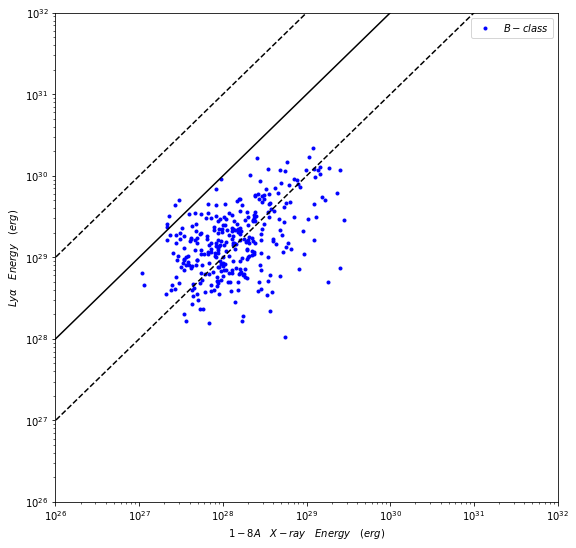

In [180]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
x=sheet4_xrs_energy_1
y=sheet4_lya_energy_1


#x2=[10**(0),10**(7)]
#y2=[10**(0),10**(7)]

x3=[10**(0),10**(6)]
y3=[10**(1),10**(7)]

x4=[10**(0),10**(5)]
y4=[10**(2),10**(7)]

x5=[10**(0),10**(4)]
y5=[10**(3),10**(7)]

#x6=[10**(0),10**(3)]
#y6=[10**(4),10**(7)]


plt.figure(figsize=(9, 9))
#plt.scatter(x, y)

x_new = np.divide(x, 10**(25))  #缩小量级，后续坐标轴重新定义坐标轴
y_new = np.divide(y, 10**(25))  #缩小量级，后续坐标轴重新定义坐标轴


plt.loglog(x_new, y_new,'b.',label=r'$B-class$')
#plt.loglog(x1,y1,'r.',label=r'$C-class$')

#plt.plot(x2,y2,'--',color='black')
plt.plot(x3,y3,'--',color='black')
plt.plot(x4,y4,'-',color='black')
plt.plot(x5,y5,'--',color='black')
#plt.plot(x6,y6,'--',color='black')

plt.ylim(10**(1),10**(7))
plt.xlim(10**(1),10**(7))
#Plot.xlim(10**(5), 10**(6));Plot.ylim(10**(5), 10**(6))

x_ticks = [10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)]#用10^0来代替10^25，因为直接显示不了这么大
x_name = [r'$10^{26}$',r'$10^{27}$',r'$10^{28}$',r'$10^{29}$',r'$10^{30}$',r'$10^{31}$',r'$10^{32}$']
plt.xticks(x_ticks,x_name)  #设置坐标刻度

y_ticks = [10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)]#用10^0来代替10^25，因为直接显示不了这么大
y_name = [r'$10^{26}$',r'$10^{27}$',r'$10^{28}$',r'$10^{29}$',r'$10^{30}$',r'$10^{31}$',r'$10^{32}$']
plt.yticks(y_ticks,y_name)  #设置坐标刻度


plt.xlabel(r'$1-8{A} \quad X-ray \quad Energy \quad (erg)$')
plt.ylabel(r'$Lyα \quad Energy \quad (erg)$')
plt.legend() #图例
plt.show()

In [182]:
np.savetxt('xrs_M.csv',sheet4_xrs_energy_1, delimiter = ',')
np.savetxt('lya_M.csv',sheet4_lya_energy_1, delimiter = ',')